In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

## 1- Assessing Data

### 1- customers table

In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers.customer_state.value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [6]:
customers.customer_state.nunique()

27

### Notes
* no missing values .
* unuseful column (customer_zip_code_prefix).
* customer_unique_id  >> unique identifier of a customer.
* customer_id	>> key to the orders dataset. Each order has a unique customer_id.

### 2- Items table

In [7]:
items = pd.read_csv("olist_order_items_dataset.csv")

In [8]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Notes
* no missing values
* order_item_id >> sequential number identifying number of items included in the same order.
* item freight value item (if an order has more than one item the freight value is splitted between items)

### 3- payment table

In [10]:
payment =pd.read_csv("olist_order_payments_dataset.csv")

In [11]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [13]:
payment.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

### Notes
* no missing values
* payment_sequential >> a customer may pay an order with more than one payment method. If he does so, a sequence will be created to.
* item freight value item (if an order has more than one item the freight value is splitted between items)
* payment_installments >> number of installments chosen by the customer.
* payment_value >> transaction value.

### 4- reviews table

In [14]:
reviews=pd.read_csv("olist_order_reviews_dataset.csv")

In [15]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [17]:
reviews.review_score.value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

### Notes
*  missing values (review_comment_title & review_comment_message )
* unuseful columns (review_comment_title & review_comment_message &	review_creation_date & review_answer_timestamp)

### 5- orders table

In [18]:
orders=pd.read_csv("olist_orders_dataset.csv")

In [19]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


### Notes
* missing values (order_approved_at , order_delivered_carrier_date, order_delivered_customer_date).
* unuseful columns (order_delivered_carrier_date).

### 6- products table

In [21]:
products =pd.read_csv("olist_products_dataset.csv")

In [22]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [24]:
products.product_category_name.nunique()

73

### Notes
* missing values (product_category_name ,product_name_lenght , product_description_lenght,product_photos_qty ,product_weight_g              
,product_length_cm ,product_height_cm , product_width_cm)  

* unuseful columns(product_description_lenght, product_name_lenght )


### 7- sellers table

In [25]:
sellers=pd.read_csv("olist_sellers_dataset.csv")

In [26]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Note
* no missing data
* unuseful column (seller_zip_code_prefix)

### 8- translation table

In [28]:
translation=pd.read_csv("product_category_name_translation.csv")
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [29]:
translation.product_category_name.nunique()

71

In [30]:
list1 = translation['product_category_name'].unique().tolist()
list2 = products['product_category_name'].unique().tolist()

diff = np.setdiff1d(list2,list1)
diff

array(['nan', 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype='<U46')

#### Note
there are 2 products (pc_gamer , portateis_cozinha_e_preparadores_de_alimentos) not included in translation table .

### assessing summary
> columns will be deleted :
* customer_zip_code_prefix 
* review_comment_title   
* review_comment_message
* review_creation_date
* review_answer_timestamp
* order_delivered_carrier_date
* product_description_lenght 
* product_name_lenght 
* seller_zip_code_prefix

> Drop missing values in all data


> There are two values in products not translated

> wrong data types  :
* order_purchase_timestamp ,order_approved_at , order_delivered_customer_date , order_estimated_delivery_date , shipping_limit_date  from object to datetime 
* order_item_id , product_photos_qty , payment_sequential , payment_installments from object to int
                 

## 2- Cleaning Data

#### 2.1  Drop unuseful columns

In [31]:
customers.drop('customer_zip_code_prefix' , axis = 1,inplace = True)

In [32]:
reviews.drop(['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'] , 
               axis = 1,inplace = True)

In [33]:
products.drop(['product_description_lenght','product_name_lenght'] , axis = 1,inplace = True)

In [34]:
sellers.drop('seller_zip_code_prefix' , axis = 1 ,inplace = True)

In [35]:
orders.drop('order_delivered_carrier_date' , axis = 1 ,inplace = True)

#### 2.2  Joining tables

In [36]:
#joining customers and orders
customers_orders = pd.merge(customers, orders , on = 'customer_id', how = 'outer')

In [37]:
#joining  customers_orders and reviews
customers_orders_reviews = pd.merge(customers_orders, reviews , on = 'order_id', how = 'outer')

In [38]:
# joining customers_orders_reviews  and items
customers_orders_reviews_items = pd.merge(customers_orders_reviews, items , on = 'order_id', how = 'outer')

In [39]:
# joining customers_orders_reviews_items and sellers
customers_orders_reviews_items_sellers = pd.merge(customers_orders_reviews_items, sellers , on = 'seller_id', how = 'outer')

In [40]:
# joining customers_orders_reviews_items_sellers and products
customers_orders_reviews_items_sellers_products = pd.merge(customers_orders_reviews_items_sellers, products ,
                                                  on = 'product_id', how = 'outer')

In [41]:
# joining customers_orders_reviews_items_sellers_products and payment
olist_data = pd.merge(customers_orders_reviews_items_sellers_products, payment ,
                                                  on = 'order_id', how = 'outer')

##### test

In [42]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 30 columns):
customer_id                      119151 non-null object
customer_unique_id               119151 non-null object
customer_city                    119151 non-null object
customer_state                   119151 non-null object
order_id                         119151 non-null object
order_status                     119151 non-null object
order_purchase_timestamp         119151 non-null object
order_approved_at                118974 non-null object
order_delivered_customer_date    115730 non-null object
order_estimated_delivery_date    119151 non-null object
review_id                        119151 non-null object
review_score                     119151 non-null int64
order_item_id                    118318 non-null float64
product_id                       118318 non-null object
seller_id                        118318 non-null object
shipping_limit_date              118318 non-null 

##### 2.3  drop nulls

In [43]:
olist_data.dropna(inplace =True)

###### Test

In [44]:
olist_data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_city                      0
seller_state                     0
product_category_name            0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments

#### 2.4 adding 2 missed products to translation table

In [45]:
df = pd.DataFrame({"product_category_name":['pc_gamer','portateis_cozinha_e_preparadores_de_alimentos'],
                    "product_category_name_english":['pc_gamer','kitchen_laptops and_food_preparators']})
  
# for appending df at the end of translation table
translation =translation.append(df, ignore_index = True)

In [46]:
olist_data = pd.merge(olist_data, translation , on = 'product_category_name', how = 'outer')

##### Test

In [47]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114074 entries, 0 to 114073
Data columns (total 31 columns):
customer_id                      114074 non-null object
customer_unique_id               114074 non-null object
customer_city                    114074 non-null object
customer_state                   114074 non-null object
order_id                         114074 non-null object
order_status                     114074 non-null object
order_purchase_timestamp         114074 non-null object
order_approved_at                114074 non-null object
order_delivered_customer_date    114074 non-null object
order_estimated_delivery_date    114074 non-null object
review_id                        114074 non-null object
review_score                     114074 non-null int64
order_item_id                    114074 non-null float64
product_id                       114074 non-null object
seller_id                        114074 non-null object
shipping_limit_date              114074 non-null 

In [48]:
olist_data.drop('product_category_name', axis=1,inplace=True)

#### 2.5 fixing wrong datatypes

In [49]:
olist_data[['order_purchase_timestamp','order_approved_at' , 'order_delivered_customer_date' , 'order_estimated_delivery_date' ,
       'shipping_limit_date']] = olist_data [['order_purchase_timestamp','order_approved_at' , 
                                              'order_delivered_customer_date' , 'order_estimated_delivery_date',
                                              'shipping_limit_date']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [50]:
olist_data[['order_item_id' , 'product_photos_qty' , 'payment_sequential' ,
            'payment_installments']] = olist_data[['order_item_id' , 'product_photos_qty' , 'payment_sequential' ,
            'payment_installments']] .astype(int)

##### Test

In [51]:
olist_data.dtypes

customer_id                              object
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                              int64
order_item_id                             int32
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
seller_city                              object
seller_state                             object
product_photos_qty                      

## 3- Data analysis & Visualisation

### Customers information in the dataset

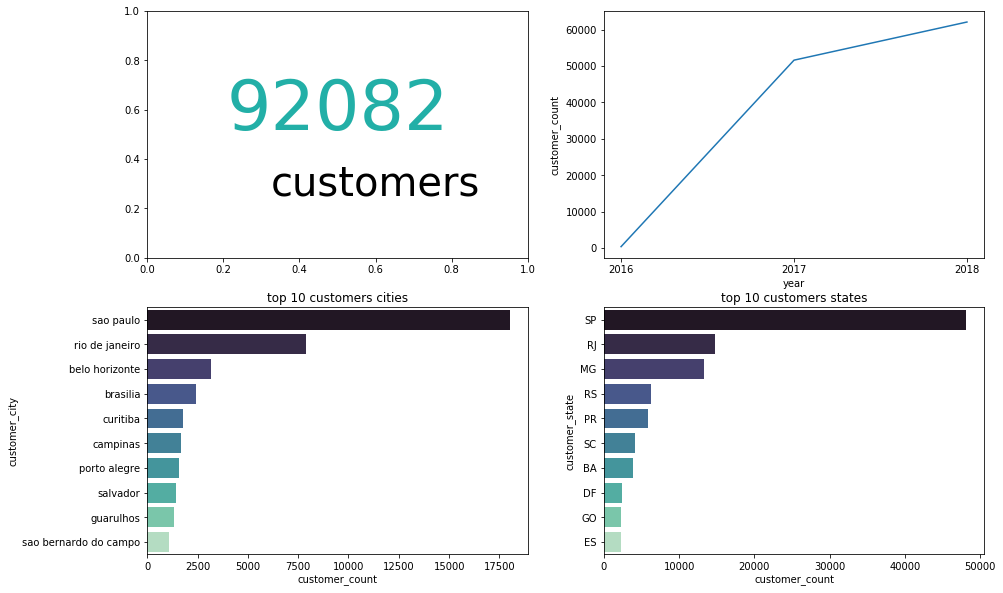

In [52]:
#plotting subplots and figure size
figure, tile = plt.subplots(2, 2,figsize =(15, 10));


#first chart 

total_cus = olist_data['customer_unique_id'].nunique()
tile[0,0].text(0.5, 0.6, total_cus, fontsize = 70 ,ha="center", va="center", color = '#22afa7');
tile[0,0].text(0.6, 0.3, 'customers', fontsize = 40 , ha="center", va="center");


#second chart

df =  olist_data[['order_purchase_timestamp', 'customer_unique_id']].copy()
# extract years from timestamp
df['year'] = df['order_purchase_timestamp'].dt.year
# group counts of customers by year
df = df.groupby('year',as_index = False)['customer_unique_id'].count()
#plotting line chart
sns.lineplot(ax= tile[0,1] , data= df, x = "year" , y= 'customer_unique_id');
# x ticks
ticks = df['year'].unique()
tile[0,1].set_xticks(ticks)
tile[0,1].set_ylabel('customer_count');


#third chart
freq = olist_data.customer_city.value_counts()[0:10]
# Get the indexes of the Series
city_order = freq.index
#plot a count plot using seaborn
sns.countplot(ax= tile[1,0],data = olist_data , y= 'customer_city' ,  order = city_order , palette= 'mako');
#plot title 
tile[1,0].set_title("top 10 customers cities");
tile[1,0].set_xlabel('customer_count');


#fourth chart
freq = olist_data.customer_state.value_counts()[0:10]
# Get the indexes of the Series
state_order = freq.index
#plot a count plot using seaborn
sns.countplot(ax= tile[1,1],data = olist_data , y= 'customer_state' ,  order = state_order , palette='mako');
#plot title 
tile[1,1].set_title("top 10 customers states");
tile[1,1].set_xlabel('customer_count');


In [53]:
olist_data.customer_city.nunique()

4073

In [54]:
olist_data.customer_state.nunique()

27

We have 114074 customer they are from 4073 city and 27 state.

Number of customers increased over the years from 2016 to 2018 and it reached it's maximum at 2018.

most popular city in our data is sao paulo. 

most popular state in our data is SP.


### Reviews

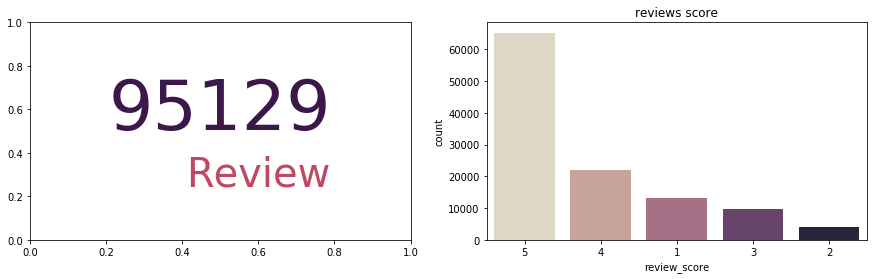

In [55]:
#plotting subplots and figure size
figure, tile = plt.subplots(1, 2,figsize =(15, 4));


#first chart 

total_reviews = olist_data['order_id'].nunique()
tile[0].text(0.5, 0.6, total_reviews, fontsize = 70 ,ha="center", va="center", color = '#3B1849');
tile[0].text(0.6, 0.3, 'Review', fontsize = 40 , ha="center", va="center",color ='#C24762');


#second chart

# Count the frequency of each unique value 
freq = olist_data.review_score.value_counts()
# Get the indexes of the Series
reviews_order = freq.index
#plot a count plot using seaborn
sns.countplot(data= olist_data , x = "review_score", order=reviews_order,  palette = "ch:s=-.2,r=.6");
#plot title 
plt.title("reviews score");

* We have 95129 reviews have score from 1 to 5 
* It seems that olist products have good quality because of it's high reviews


### Orders

C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


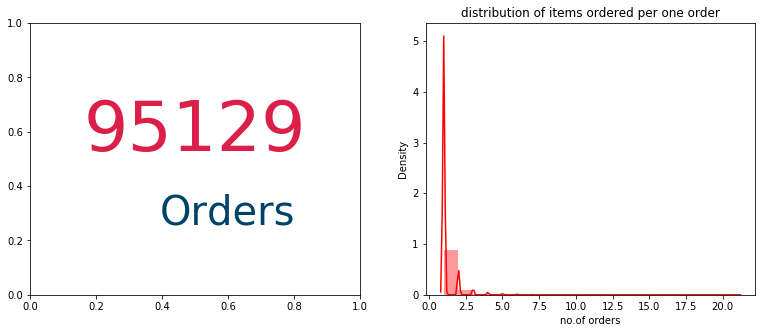

In [56]:
#plotting subplots and figure size
figure, tile = plt.subplots(1, 2,figsize =(13, 5));


#first chart 

total_orders = olist_data['order_id'].nunique()
tile[0].text(0.5, 0.6, total_orders, fontsize = 70 ,ha="center", va="center", color = '#DB1F48');
tile[0].text(0.6, 0.3, 'Orders', fontsize = 40 , ha="center", va="center", color = '#004369');

#second chart

#set bin edges start and end
bin_edges = np.arange(1, olist_data['order_item_id'].max()+1, 1)
#plot histogram 
sns.distplot(olist_data['order_item_id'], bins = bin_edges, color = 'red');
plt.title("distribution of items ordered per one order");
plt.xlabel("no.of orders");


In [57]:
olist_data.order_item_id.max()

21

In [58]:
olist_data.order_status.value_counts()

delivered    114067
canceled          7
Name: order_status, dtype: int64

* we have 95129 order in our data.
* Most of customers order just one item per order.
* Max number of items in the same order was 21.
* only 7 orders canceled and others delivered.

### sellers

In [59]:
olist_data.seller_state.nunique()

22

In [60]:
olist_data.seller_city.nunique()

588

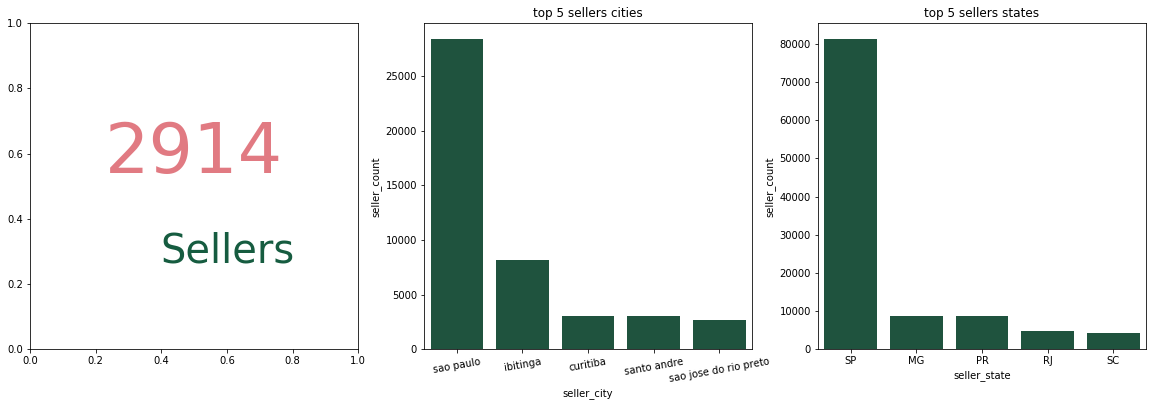

In [61]:
#plotting subplots and figure size
figure, tile = plt.subplots(1, 3,figsize =(20, 6));

# first chart
count_seller = olist_data['seller_id'].nunique()
tile[0].text(0.5, 0.6, count_seller, fontsize = 70 ,ha="center", va="center", color = '#E17A82');
tile[0].text(0.6, 0.3, 'Sellers', fontsize = 40 , ha="center", va="center", color='#165C40');


#second chart
freq = olist_data.seller_city.value_counts()[0:5]
# Get the indexes of the Series
city_order = freq.index
#plot a count plot using seaborn
sns.countplot(ax= tile[1],data = olist_data , x= 'seller_city' ,  order = city_order , color= '#165C40');
#plot title 
tile[1].set_title("top 5 sellers cities");
tile[1].set_ylabel('seller_count');
tile[1].set_xticklabels(labels= freq.index,rotation=10);



#third chart
freq = olist_data.seller_state.value_counts()[0:5]
# Get the indexes of the Series
state_order = freq.index
#plot a count plot using seaborn
sns.countplot(ax= tile[2],data = olist_data , x= 'seller_state' ,  order = state_order , color= '#165C40');
#plot title 
tile[2].set_title("top 5 sellers states");
tile[2].set_ylabel('seller_count');

* we have 2914 sellers located in 22 state and 588 city 
* top city is sao paulo and top state is SP

C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

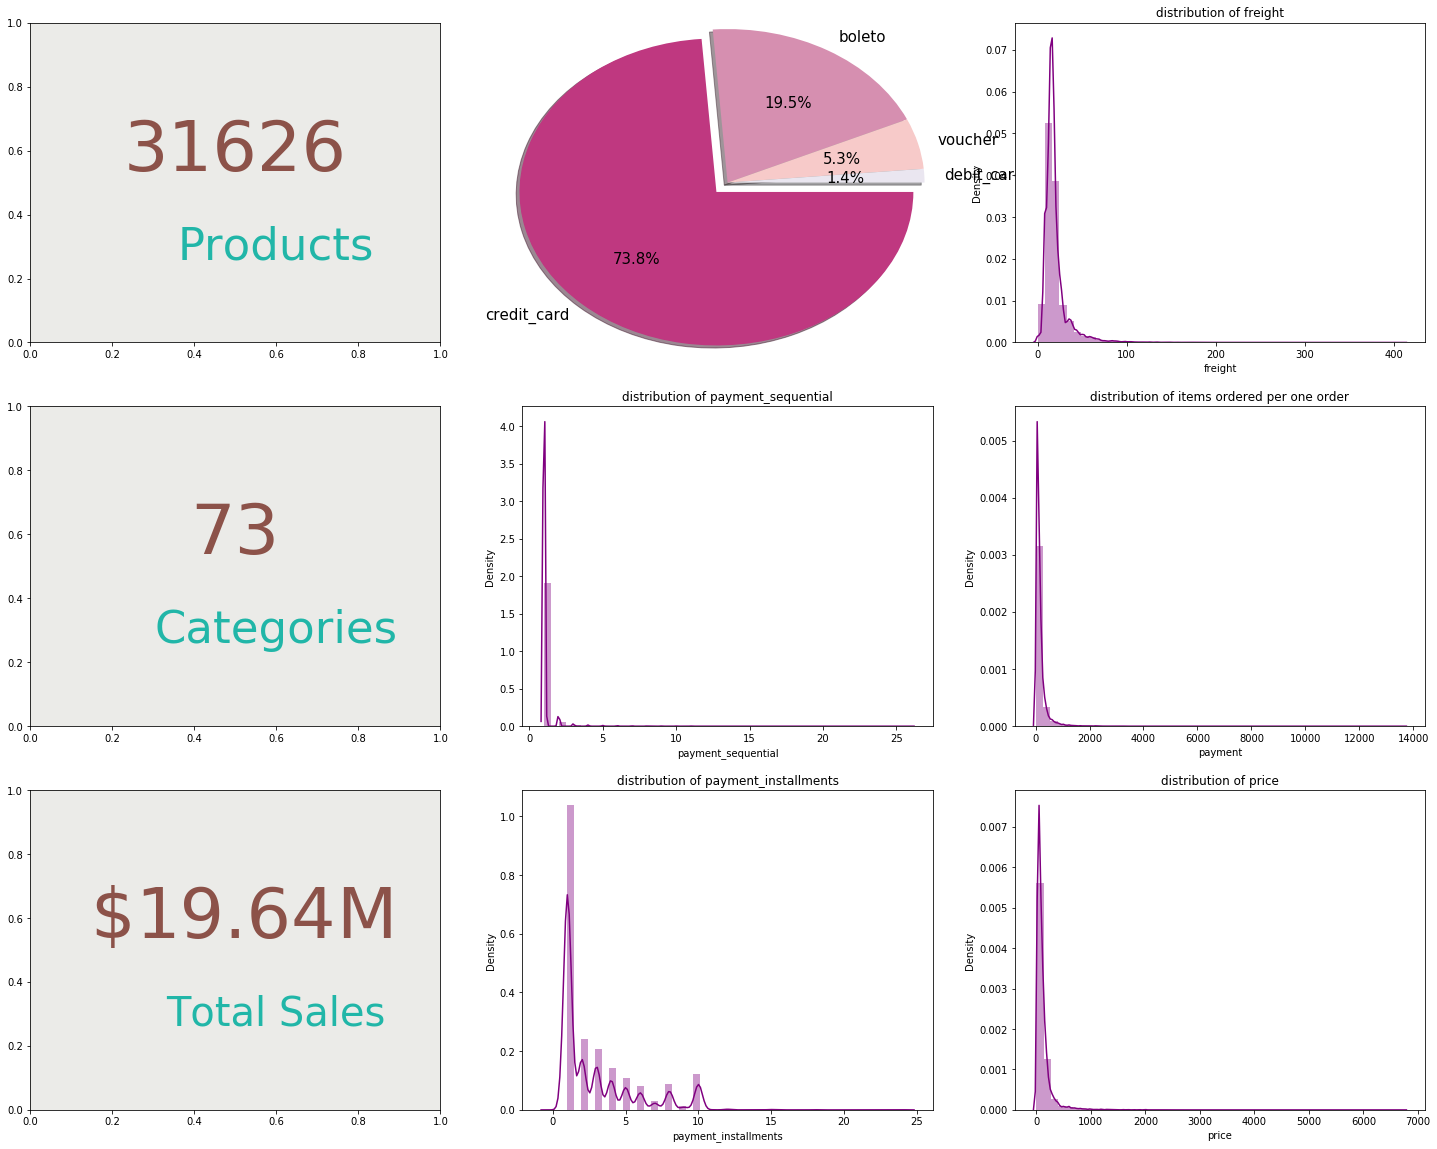

In [62]:

#plotting subplots and figure size
figure, tile = plt.subplots(3, 3,figsize =(25, 20));

# first chart
tile[0,0].set_facecolor('#EBEBE8')
count_products = olist_data['product_id'].nunique()
tile[0,0].text(0.5, 0.6, count_products, fontsize = 70 ,ha="center", va="center", color = '#8C5249');
tile[0,0].text(0.6, 0.3, 'Products', fontsize = 45 , ha="center", va="center", color='#21B6A8');

# second chart
tile[1,0].set_facecolor('#EBEBE8')
count_categories = olist_data['product_category_name_english'].nunique()
tile[1,0].text(0.5, 0.6, count_categories, fontsize = 70 ,ha="center", va="center", color = '#8C5249');
tile[1,0].text(0.6, 0.3, 'Categories', fontsize = 45 , ha="center", va="center", color='#21B6A8');

# third chart
tile[2,0].set_facecolor('#EBEBE8')
count_sales = round(olist_data['payment_value'].sum()/1000000,2)
tile[2,0].text(0.5, 0.6, count_sales, fontsize = 70 ,ha="center", va="center", color = '#8C5249');
tile[2,0].text(0.82, 0.6, 'M', fontsize = 70 ,ha="center", va="center", color = '#8C5249');
tile[2,0].text(0.2, 0.6, '$', fontsize = 70 ,ha="center", va="center", color = '#8C5249');
tile[2,0].text(0.6, 0.3, 'Total Sales', fontsize = 40 , ha="center", va="center", color='#21B6A8');

#fourth chart 
#counting each type
payment_type_count = olist_data.payment_type.value_counts()
color=['#BF3880','#D68FB0','#F7CAC9','#EAE6F0']
explode = (0.1,0,0,0)
text_props = {'fontsize': 15}
tile[0,1].pie(payment_type_count ,explode=explode, labels = payment_type_count.index, counterclock = False,
        autopct='%1.1f%%',shadow = True, labeldistance=1.1,colors=color, textprops = text_props , radius = 1.2);
 
# 5th chart
sns.distplot(olist_data['payment_sequential'],  color = 'purple',ax = tile[1,1]);
tile[1,1].set_title("distribution of payment_sequential");
tile[1,1].set_xlabel("payment_sequential");


# 6th chart
sns.distplot(olist_data['payment_installments'],  color = 'purple' ,ax = tile[2,1]);
tile[2,1].set_title("distribution of payment_installments");
tile[2,1].set_xlabel("payment_installments");


# 7th chart
#plot histogram 
sns.distplot(olist_data['freight_value'],  color = 'purple',ax = tile[0,2]);
tile[0,2].set_title("distribution of freight");
tile[0,2].set_xlabel("freight");


# 8th chart
sns.distplot(olist_data['payment_value'],  color = 'purple',ax = tile[1,2]);
tile[1,2].set_title("distribution of items ordered per one order");
tile[1,2].set_xlabel("payment");


# 9th chart
sns.distplot(olist_data['price'],  color = 'purple',ax=tile[2,2]);
tile[2,2].set_title("distribution of price");
tile[2,2].set_xlabel("price");


In [63]:
olist_data.payment_installments.value_counts()

1     56811
2     13244
3     11403
4      7756
10     6707
5      5863
8      4914
6      4491
7      1752
9       705
12      163
15       90
18       38
24       34
11       25
20       20
13       18
14       15
16        7
17        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64

* We have 31626 products divided into 73 categories
* There are 4 payment methods about of 73% of people pay using credit card
* Totals sales are about 19.6 M 
* most of customers choose 1 payment sequential 
* most customers pay freight less than 100 
* payment sequential between 1 to 22 

### product dimensions 

C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

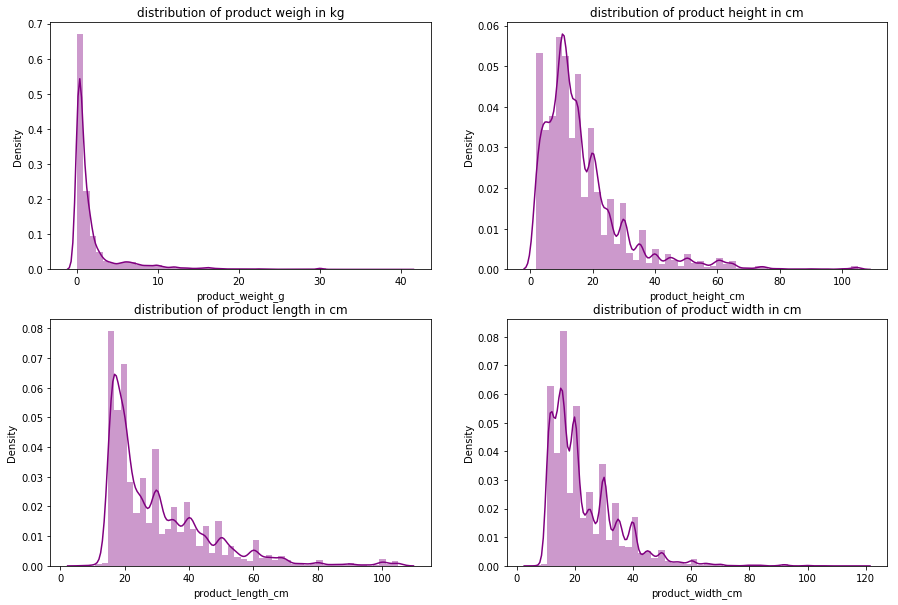

In [64]:
#plotting subplots and figure size
figure, tile = plt.subplots(2, 2,figsize =(15, 10));
sns.distplot(olist_data['product_weight_g']/1000,  color = 'purple',ax = tile[0,0]);
tile[0,0].set_title("distribution of product weigh in kg");


sns.distplot(olist_data['product_length_cm'],  color = 'purple',ax = tile[1,0]);
tile[1,0].set_title("distribution of product length in cm");



sns.distplot(olist_data['product_height_cm'],  color = 'purple',ax = tile[0,1]);
tile[0,1].set_title("distribution of product height in cm");



sns.distplot(olist_data['product_width_cm'],  color = 'purple',ax = tile[1,1]);
tile[1,1].set_title("distribution of product width in cm");



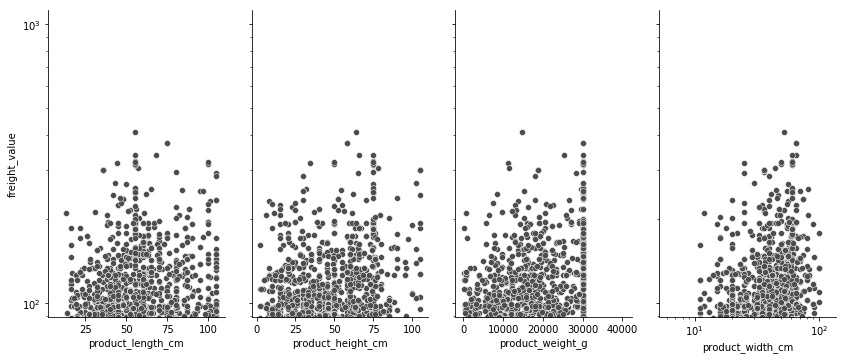

In [65]:
grid=sns.PairGrid(olist_data, y_vars=['freight_value'],x_vars=['product_length_cm', 'product_height_cm','product_weight_g',
                                                       'product_width_cm'],height=5,aspect=0.6)

grid.map(sns.scatterplot,color=".3");
plt.yscale("log")
plt.xscale("log")

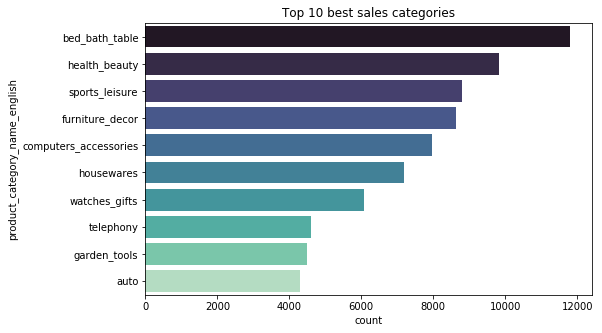

In [66]:
plt.figure(figsize=(8,5))
freq = olist_data.product_category_name_english.value_counts()[0:10]
# Get the indexes of the Series
product_order = freq.index
sns.countplot(data = olist_data , y= 'product_category_name_english' ,  order = product_order , palette= 'mako');
plt.title("Top 10 best sales categories");


### Calculate RFM

In [67]:
df3= olist_data.copy()

In [68]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114074 entries, 0 to 114073
Data columns (total 30 columns):
customer_id                      114074 non-null object
customer_unique_id               114074 non-null object
customer_city                    114074 non-null object
customer_state                   114074 non-null object
order_id                         114074 non-null object
order_status                     114074 non-null object
order_purchase_timestamp         114074 non-null datetime64[ns]
order_approved_at                114074 non-null datetime64[ns]
order_delivered_customer_date    114074 non-null datetime64[ns]
order_estimated_delivery_date    114074 non-null datetime64[ns]
review_id                        114074 non-null object
review_score                     114074 non-null int64
order_item_id                    114074 non-null int32
product_id                       114074 non-null object
seller_id                        114074 non-null object
shipping_limit_date

In [69]:
max_date = max(df3['order_purchase_timestamp']) + pd.to_timedelta(1, 'D')


# Calculate Recency, Frequency and Monetary value for each customer 
RFM_data = df3.groupby(['customer_unique_id'],as_index=False).agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'})


# Rename the columns 
RFM_data.rename(columns={'order_purchase_timestamp': 'Recency',
                         'order_id': 'Frequency',
                         'payment_value': 'MonetaryValue'}, inplace=True)

In [70]:
RFM_data.head()

,customer_unique_id,Recency,Frequency,MonetaryValue
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [71]:
RFM_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92082 entries, 0 to 92081
Data columns (total 4 columns):
customer_unique_id    92082 non-null object
Recency               92082 non-null int64
Frequency             92082 non-null int64
MonetaryValue         92082 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ MB


In [72]:
np.max(RFM_data.Frequency)

75

In [73]:
np.mean(RFM_data.Recency)

237.22018418366238

In [74]:
np.mean(RFM_data.Frequency)

1.238830607502009

In [75]:
np.mean(RFM_data.MonetaryValue)

213.25602495601277

In [76]:
RFM_data. describe()

,Recency,Frequency,MonetaryValue
count,92082.000000,92082.000000,92082.000000
mean,237.220184,1.238831,213.256025
std,152.583701,0.847653,647.733987
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.902500
50%,218.000000,1.000000,112.955000
75%,346.000000,1.000000,203.090000
max,695.000000,75.000000,109312.640000


### Data preprocessing

C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

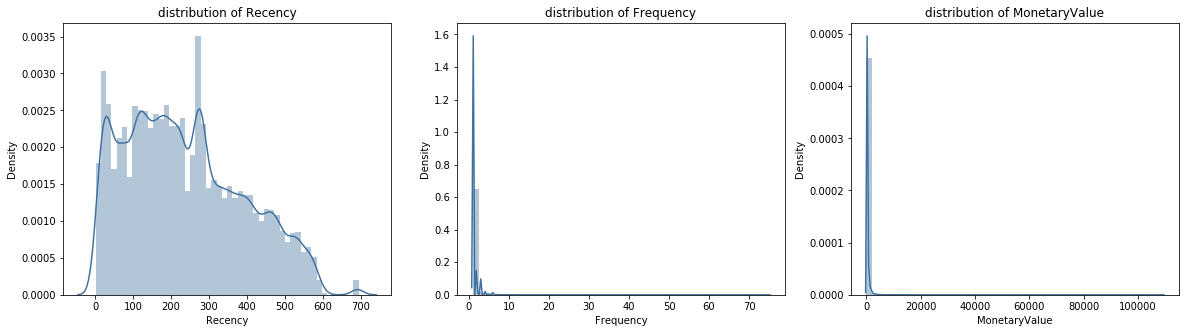

In [77]:
#plotting subplots and figure size
figure, tile = plt.subplots(1, 3,figsize =(20, 5));
 
sns.distplot(RFM_data['Recency'] ,color = '#41729F', ax = tile[0]);
tile[0].set_title("distribution of Recency");



sns.distplot(RFM_data['Frequency'],  color = '#41729F',ax = tile[1]);
tile[1].set_title("distribution of Frequency");



sns.distplot(RFM_data['MonetaryValue'],  color = '#41729F',ax = tile[2]);
tile[2].set_title("distribution of MonetaryValue");



In [78]:
RFM_data['recency_log'] = np.log(RFM_data['Recency'])
RFM_data['freq_log'] = np.log(RFM_data['Frequency'])
RFM_data['monetary_log'] = np.log(RFM_data['MonetaryValue'])

C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

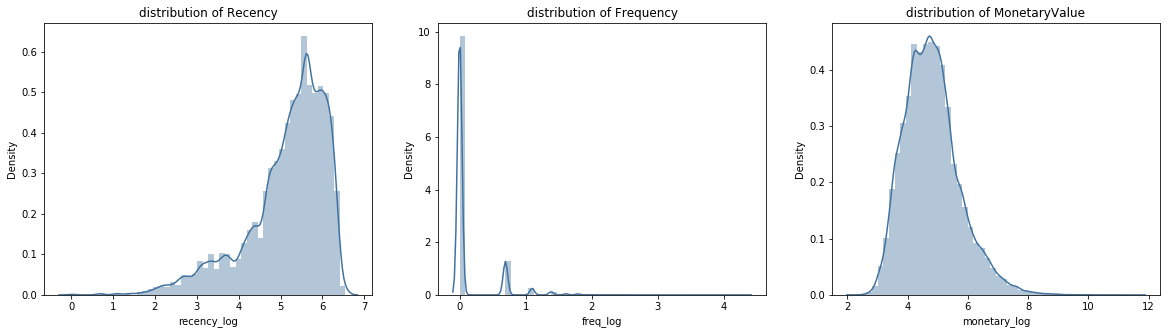

In [79]:
#plotting subplots and figure size
figure, tile = plt.subplots(1, 3,figsize =(20, 5));
 
sns.distplot(RFM_data['recency_log'] ,color = '#41729F', ax = tile[0]);
tile[0].set_title("distribution of Recency");



sns.distplot(RFM_data['freq_log'],  color = '#41729F',ax = tile[1]);
tile[1].set_title("distribution of Frequency");



sns.distplot(RFM_data['monetary_log'],  color = '#41729F',ax = tile[2]);
tile[2].set_title("distribution of MonetaryValue");


In [80]:
log_data = RFM_data[['recency_log','freq_log','monetary_log','customer_unique_id']].copy()

In [81]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92082 entries, 0 to 92081
Data columns (total 4 columns):
recency_log           92082 non-null float64
freq_log              92082 non-null float64
monetary_log          92082 non-null float64
customer_unique_id    92082 non-null object
dtypes: float64(3), object(1)
memory usage: 3.5+ MB


In [82]:
col_names = ['recency_log', 'freq_log','monetary_log']

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(log_data[col_names])
                                   
scaled_data = pd.DataFrame(scaled_data, columns = col_names)
scaled_data.head()

,recency_log,freq_log,monetary_log
0,-0.453533,-0.387569,0.165575
1,-0.425790,-0.387569,-1.635747
2,1.191639,-0.387569,-0.377589
3,0.651585,-0.387569,-1.120442
4,0.537729,-0.387569,0.522643


In [84]:
log_data.head()

,recency_log,freq_log,monetary_log,customer_unique_id
0,4.718499,0.0,4.955123,0000366f3b9a7992bf8c76cfdf3221e2
1,4.744932,0.0,3.302849,0000b849f77a49e4a4ce2b2a4ca5be3f
2,6.285998,0.0,4.456902,0000f46a3911fa3c0805444483337064
3,5.771441,0.0,3.775516,0000f6ccb0745a6a4b88665a16c9f078
4,5.662960,0.0,5.282645,0004aac84e0df4da2b147fca70cf8255


In [85]:
log_data = log_data.drop(columns=col_names ,axis=1)
df_norm = log_data.merge(scaled_data , how="left", left_index=True,  right_index=True)


In [86]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92082 entries, 0 to 92081
Data columns (total 4 columns):
customer_unique_id    92082 non-null object
recency_log           92082 non-null float64
freq_log              92082 non-null float64
monetary_log          92082 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.0+ MB


In [87]:
df_norm.head()

,customer_unique_id,recency_log,freq_log,monetary_log
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.453533,-0.387569,0.165575
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.425790,-0.387569,-1.635747
2,0000f46a3911fa3c0805444483337064,1.191639,-0.387569,-0.377589
3,0000f6ccb0745a6a4b88665a16c9f078,0.651585,-0.387569,-1.120442
4,0004aac84e0df4da2b147fca70cf8255,0.537729,-0.387569,0.522643


In [88]:
df_norm.describe()

,recency_log,freq_log,monetary_log
count,9.208200e+04,9.208200e+04,9.208200e+04
mean,5.820707e-16,4.489246e-15,6.205033e-16
std,1.000005e+00,1.000005e+00,1.000005e+00
min,-5.405844e+00,-3.875689e-01,-2.771883e+00
25%,-4.349565e-01,-3.875689e-01,-7.041536e-01
50%,2.454646e-01,-3.875689e-01,-8.313724e-02
75%,7.302987e-01,-3.875689e-01,5.564440e-01
max,1.462333e+00,1.237337e+01,7.412020e+00


C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

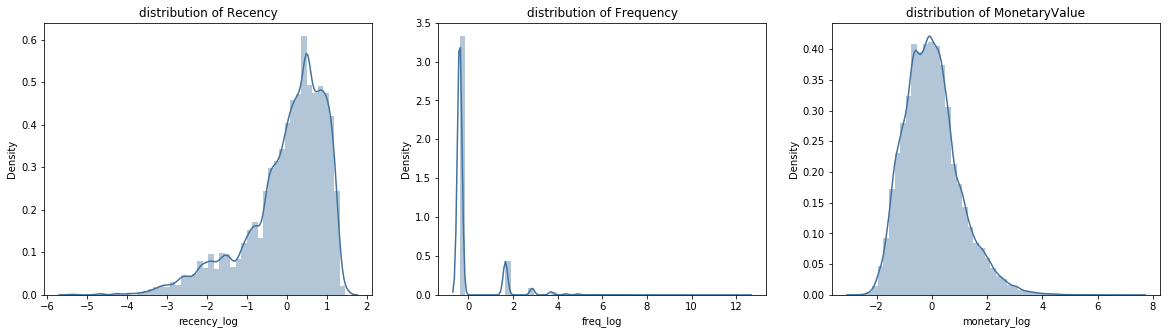

In [89]:
#plotting subplots and figure size
figure, tile = plt.subplots(1, 3,figsize =(20, 5));
 
sns.distplot(df_norm['recency_log'] ,color = '#41729F', ax = tile[0]);
tile[0].set_title("distribution of Recency");



sns.distplot(df_norm['freq_log'],  color = '#41729F',ax = tile[1]);
tile[1].set_title("distribution of Frequency");



sns.distplot(df_norm['monetary_log'],  color = '#41729F',ax = tile[2]);
tile[2].set_title("distribution of MonetaryValue");

## KMeans algorithm

### 3 clusters

In [90]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters
kmeans = KMeans (n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df_norm[col_names])

# Extract cluster labels
cluster_labels = kmeans.labels_

In [91]:
# Create a DataFrame by adding a new cluster label column
data_rfm_k3 = df_norm.assign(Cluster = cluster_labels)

# Group the data by cluster
groupe = data_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
groupe.agg({
    'recency_log': 'mean',
    'freq_log': 'mean',
    'monetary_log': ['mean'],
    'customer_unique_id': 'count'}).round(1)

,recency_log,freq_log,monetary_log,customer_unique_id
,mean,mean,mean,count
Cluster,,,,
0,0.4,-0.4,-0.2,62111
1,0.1,2.2,1.1,13024
2,-1.6,-0.3,-0.1,16947


In [92]:
data_rfm_k3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92082 entries, 0 to 92081
Data columns (total 5 columns):
customer_unique_id    92082 non-null object
recency_log           92082 non-null float64
freq_log              92082 non-null float64
monetary_log          92082 non-null float64
Cluster               92082 non-null int32
dtypes: float64(3), int32(1), object(1)
memory usage: 6.4+ MB


In [93]:
data_rfm_k3.head()

,customer_unique_id,recency_log,freq_log,monetary_log,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.453533,-0.387569,0.165575,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.425790,-0.387569,-1.635747,0
2,0000f46a3911fa3c0805444483337064,1.191639,-0.387569,-0.377589,0
3,0000f6ccb0745a6a4b88665a16c9f078,0.651585,-0.387569,-1.120442,0
4,0004aac84e0df4da2b147fca70cf8255,0.537729,-0.387569,0.522643,0


### elbow method

In [94]:
error_value = {}

# Fit KMeans and calculate erorr for each k
for k in range(1,11):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters= k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(df_norm[col_names])
    
    # Assign sum of squared distances to k element of dictionary
    error_value[k] = kmeans.inertia_
error_value

{1: 276246.0,
 2: 181648.15029780698,
 3: 127011.43370532797,
 4: 96230.8171956113,
 5: 83310.38651048696,
 6: 73119.06463485946,
 7: 64459.67266576137,
 8: 58536.57002501984,
 9: 53047.08306210317,
 10: 48333.78303575344}

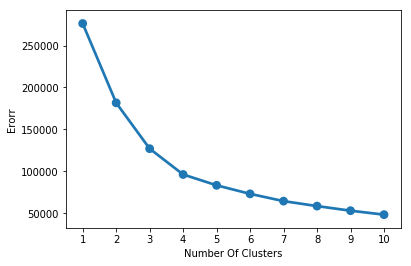

In [95]:
plt.xlabel('Number Of Clusters')
plt.ylabel('Erorr')

# Plot Error values for each key in the dictionary
sns.pointplot(x=list(error_value.keys()), y=list(error_value.values()))

plt.show()

#### according to chart we will try  4 and 5 clusters

## 4 clusters

In [96]:
# Initialize KMeans
kmeans = KMeans (n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df_norm [col_names])

# Extract cluster labels
cluster_labels = kmeans.labels_

In [97]:
data_rfm_k4 = df_norm.assign(Cluster = cluster_labels)

In [98]:
data_rfm_k4.head()

,customer_unique_id,recency_log,freq_log,monetary_log,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.453533,-0.387569,0.165575,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.425790,-0.387569,-1.635747,3
2,0000f46a3911fa3c0805444483337064,1.191639,-0.387569,-0.377589,3
3,0000f6ccb0745a6a4b88665a16c9f078,0.651585,-0.387569,-1.120442,3
4,0004aac84e0df4da2b147fca70cf8255,0.537729,-0.387569,0.522643,1


In [99]:
result_4clusters = pd.merge(RFM_data,data_rfm_k4[['Cluster','customer_unique_id']], how='outer', on ='customer_unique_id')

In [100]:
result_4clusters.head()

,customer_unique_id,Recency,Frequency,MonetaryValue,recency_log,freq_log,monetary_log,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4.718499,0.0,4.955123,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4.744932,0.0,3.302849,3
2,0000f46a3911fa3c0805444483337064,537,1,86.22,6.285998,0.0,4.456902,3
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,5.771441,0.0,3.775516,3
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.662960,0.0,5.282645,1


In [101]:
groupe = result_4clusters.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
groupe.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'customer_unique_id': 'count'}).round(1)

,Recency,Frequency,MonetaryValue,customer_unique_id
Cluster,,,,
0,246.6,2.6,599.2,12809
1,275.0,1.0,270.1,28387
2,40.0,1.0,135.9,14693
3,284.3,1.0,63.5,36193


#### now we will try with 5 clusters and choose the one who is best in variation

## 5 clusters

In [102]:
# Initialize KMeans
kmeans = KMeans (n_clusters=5, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df_norm [col_names])

# Extract cluster labels
cluster_labels = kmeans.labels_

In [103]:
data_rfm_k5 = df_norm.assign(Cluster = cluster_labels)

In [104]:
data_rfm_k5.head()

,customer_unique_id,recency_log,freq_log,monetary_log,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.453533,-0.387569,0.165575,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.425790,-0.387569,-1.635747,0
2,0000f46a3911fa3c0805444483337064,1.191639,-0.387569,-0.377589,0
3,0000f6ccb0745a6a4b88665a16c9f078,0.651585,-0.387569,-1.120442,0
4,0004aac84e0df4da2b147fca70cf8255,0.537729,-0.387569,0.522643,2


In [105]:
result_5clusters = pd.merge(RFM_data,data_rfm_k5[['Cluster','customer_unique_id']], how='outer', on ='customer_unique_id')

In [106]:
result_5clusters.head()

,customer_unique_id,Recency,Frequency,MonetaryValue,recency_log,freq_log,monetary_log,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4.718499,0.0,4.955123,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4.744932,0.0,3.302849,0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,6.285998,0.0,4.456902,0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,5.771441,0.0,3.775516,0
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.662960,0.0,5.282645,2


In [107]:
groupe = result_5clusters.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
groupe.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'customer_unique_id': 'count'}).round(1)

,Recency,Frequency,MonetaryValue,customer_unique_id
Cluster,,,,
0,284.6,1.0,64.3,36332
1,229.8,4.4,1495.8,2989
2,274.2,1.0,272.8,27936
3,39.9,1.0,136.0,14590
4,251.6,2.1,315.1,10235


* cluster 3 have smallest recency but did not spend much money they may be new customers >> new_customer.
* cluster 0 have largest recency and smallest monetary value I think they churned >> Risk to churne.
* cluster 1 have intermediate recency  and largest frequency and largest monetaryvalue >> active_customer.
* cluster 2 have large recency , small frequency and small monetaryvalue >> not_active_customer.
* cluster 4 have intermediate recency and intermediate frequency and intermediate monetaryvalue >> intermediate_customer.

#### Rename clusters in result data with new names

In [108]:
result_5clusters['Cluster'].replace(0,"risk to churn", inplace = True)
result_5clusters['Cluster'].replace(1,"active_customer", inplace = True)
result_5clusters['Cluster'].replace(2,"not_active_customer", inplace = True)
result_5clusters['Cluster'].replace(3,"new_customer", inplace = True)
result_5clusters['Cluster'].replace(4,"intermediate_customer", inplace = True)


In [109]:
result_5clusters.Cluster.value_counts()

risk to churn            36332
not_active_customer      27936
new_customer             14590
intermediate_customer    10235
active_customer           2989
Name: Cluster, dtype: int64

In [110]:
result_5clusters.to_csv("5_clusters.csv",index=False)

## Data analysis by clusters

In [111]:
olist_data = pd.merge(olist_data, result_5clusters[['Cluster','customer_unique_id']] , 
                      on = 'customer_unique_id',  how = 'outer')

In [112]:
olist_data.head(10)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,Cluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,8683.0,54.0,64.0,31.0,1,credit_card,2,146.87,office_furniture,not_active_customer
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,2017-12-19,...,8683.0,54.0,64.0,31.0,1,credit_card,1,275.79,office_furniture,intermediate_customer
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,2017-12-19,...,8683.0,54.0,64.0,31.0,1,credit_card,1,275.79,office_furniture,intermediate_customer
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-26 09:54:04,2017-06-12,...,8683.0,54.0,64.0,31.0,1,credit_card,7,140.61,office_furniture,not_active_customer
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-28 21:09:00,2018-03-22,...,8683.0,54.0,64.0,31.0,1,credit_card,10,137.58,office_furniture,not_active_customer
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-04-11 10:16:56,2017-04-24,...,8683.0,54.0,64.0,31.0,1,credit_card,5,142.05,office_furniture,not_active_customer
6,fbd40c083aa8cddebb5265b2ba6aaf2e,f40ab89b622248b7ca125af4b486b887,contagem,MG,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-29 12:04:19,2017-06-07,...,8683.0,54.0,64.0,31.0,1,boleto,1,155.70,office_furniture,not_active_customer
7,10558ef4afea173bfb5e2cbe3d5b0bb5,749943913a9851a39c9baf51877fbab6,varzea grande,MT,eaae5bd20fb15d85aa673d9b7c0e8ca5,delivered,2017-03-18 23:04:36,2017-03-18 23:04:36,2017-05-30 09:19:58,2017-04-27,...,8683.0,54.0,64.0,31.0,1,credit_card,2,148.33,office_furniture,not_active_customer
8,1c37c0f0cd1d88d46d9fc9494762abbd,432ecfa8b7b7ad2663c7abed0dc83c51,belo horizonte,MG,c4e2bd2043fbd75b325a47adfabf0d77,delivered,2018-03-15 07:45:10,2018-03-15 07:55:24,2018-04-05 12:37:25,2018-04-19,...,8683.0,54.0,64.0,31.0,1,credit_card,3,150.07,office_furniture,not_active_customer
9,20a452f528d487411fd7d3ebda1d0f20,31318a0597cd9d50ce4cfd03c80fe780,santa rita do sapucai,MG,1c7fe02ac4c7be50c59afb295cf85b89,delivered,2018-01-26 13:22:09,2018-01-30 03:47:31,2018-02-20 14:18:51,2018-03-12,...,8683.0,54.0,64.0,31.0,1,boleto,1,257.50,office_furniture,intermediate_customer


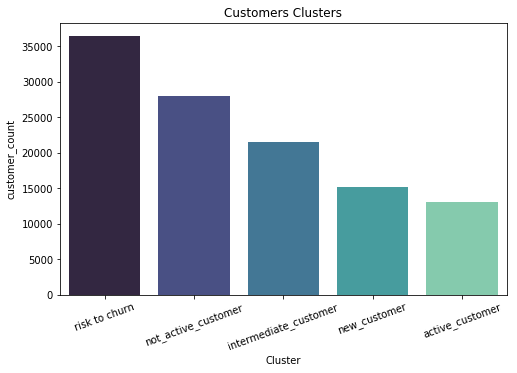

In [113]:
plt.figure(figsize=(8,5))
freq = olist_data.Cluster.value_counts()
cluster_order = freq.index
#plot a count plot using seaborn
sns.countplot(data = olist_data , x= 'Cluster' ,  order = cluster_order , palette='mako');
#plot title and ticks rotation
plt.title("Customers Clusters");
plt.xticks(rotation=20)
plt.ylabel('customer_count');

##### alot of customers are risk to churn 

### customer count for each cluster over the years

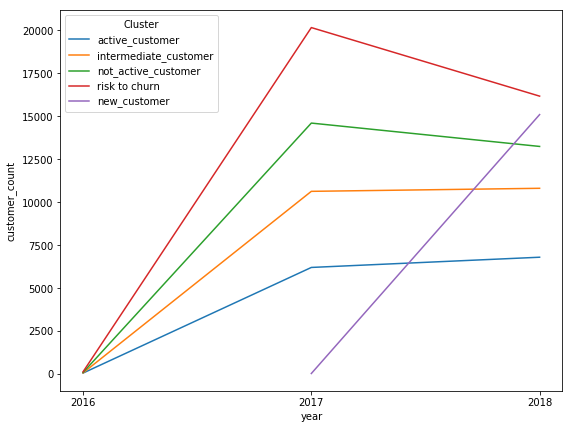

In [114]:
plt.figure(figsize=(9,7))

clust_year =  olist_data[['order_purchase_timestamp', 'customer_unique_id','Cluster']].copy()
# extract years from timestamp
clust_year['year'] = clust_year['order_purchase_timestamp'].dt.year
# group counts of customers by year
clust_year = clust_year.groupby(['year','Cluster'],as_index = False)['customer_unique_id'].count()
#plotting line chart
sns.lineplot( data= clust_year , x = "year" , y= 'customer_unique_id' ,hue='Cluster');
# x ticks
ticks = df['year'].unique()
plt.xticks(ticks)
plt.ylabel('customer_count');

* new customers started purchase in 2017
* in all clusters count of custmers increase over time
* intermediate and active customers increased from 2016 to 2017 and did not change from 2017 to 2018
* risk to churn customers and not active decreased from 2017 to 2018

### payment_value for each cluster over the years

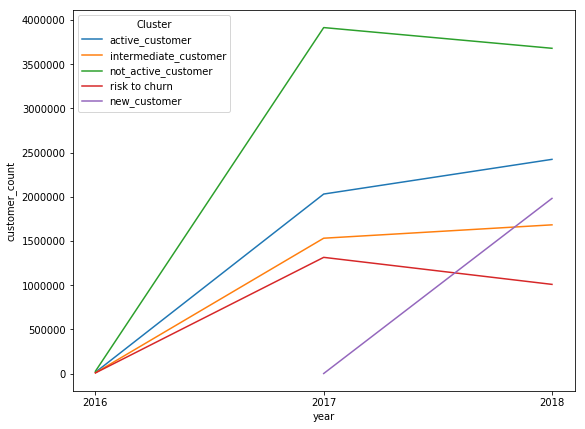

In [115]:
plt.figure(figsize=(9,7))

clust_year =  olist_data[['order_purchase_timestamp', 'payment_value','Cluster']].copy()
# extract years from timestamp
clust_year['year'] = clust_year['order_purchase_timestamp'].dt.year
# group counts of customers by year
clust_year = clust_year.groupby(['year','Cluster'],as_index = False)['payment_value'].sum()
#plotting line chart
sns.lineplot( data= clust_year , x = "year" , y= 'payment_value' ,hue='Cluster');
# x ticks
ticks = df['year'].unique()
plt.xticks(ticks)
plt.ylabel('customer_count');

* not_active customers have the largest payment value.
* risk to churn customers have the smallest payment value.
* new customers start pay from 2017 and increased in 2018
* active customers have large payment value increased from 2017 to 2018
* intermediate customers have fixed payment value from 2017 to 2018

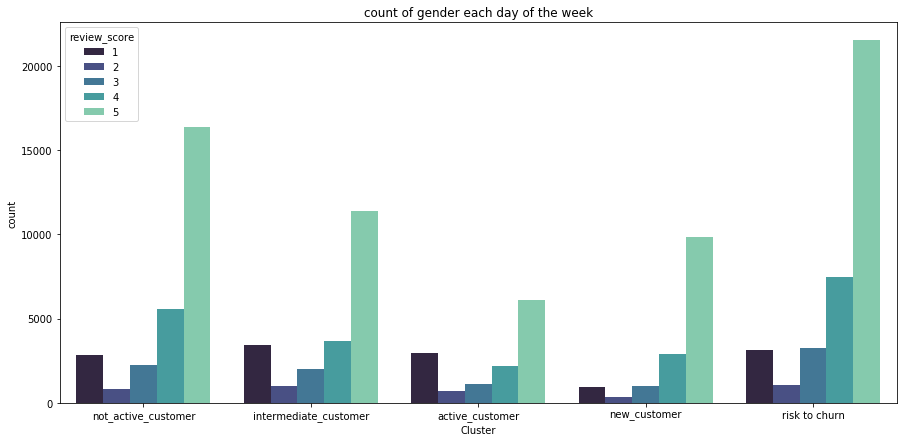

In [116]:
#figure size
plt.figure(figsize=(15,7));

#plotting count plot
sns.countplot(data = olist_data, x = 'Cluster', hue = 'review_score', palette="mako");

#plot title 
plt.title("count of gender each day of the week");

* most of reviews for all clusters are 5 

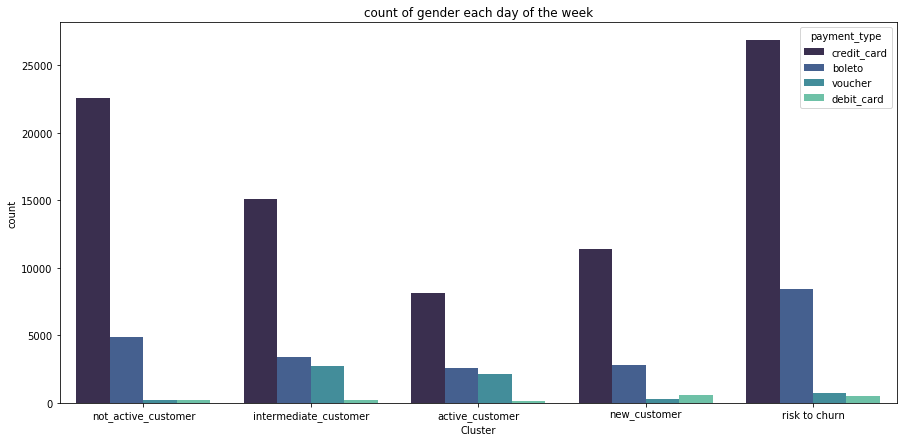

In [117]:
#figure size
plt.figure(figsize=(15,7));

#plotting count plot
sns.countplot(data = olist_data, x = 'Cluster', hue = 'payment_type', palette="mako");

#plot title 
plt.title("count of gender each day of the week");

* most of customers pay using credit_card.
* intermediate customers and active customers are the most who use debit_card.  